In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
import numpy as np
import imageio
from geopandas import GeoSeries
from shapely.geometry import Point,Polygon


In [8]:
map = gpd.read_file("Indian_States.shp")
map_df=map.iloc[[35,1,2,3,5,23,8,9,10,11,12,13,14,15,17,18,19,20,21,22,34,25,26,27,28,29,30,31,32,33], :]

df = pd.read_csv("data_9_metrics_15_16_vis.csv", header=0)
df_edges=pd.read_csv("edges_order_of_appearance.csv", header=0)

#To account for the fact that python starts indexing from 0 unlike R which starts from 1.
edges=list(df_edges['x'])
for i in range(len(edges)):
    c=edges[i]
    edges[i]=c-1

In [3]:
'''di=list(df['DI'])
color = []
for i in range(len(edges)):
    c=edges[i]
    if di[c]<=0.3:color.append([0.8+0.001*i,0,0])
    elif di[c]>0.3 and di[c]<=0.45: color.append([0.8+0.001*i,0.5+0.001*i,0])
    elif di[c]>0.45 and di[c]<=0.6:color.append([0.8+0.001*i,0.8+0.001*i,0])
    elif di[c]>0.6 and di[c]<=0.75:color.append([0,0.8+0.001*i,0])
    elif di[c]>0.75:color.append([0,0,0.8+0.001*i])
color=np.array(color)'''

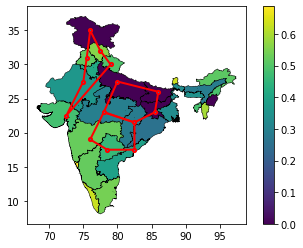

In [37]:
base = map_df.plot(column=df['DI_GM'], edgecolor='black', linewidth=0.5, legend=True)
p1 = Polygon([(86,26),(85.5,23),(82.5,21.5),(78,23),(80,27.5)])
p2 = Polygon([(82.5,17.5),(82.5,21.5),(78,23),(76,19),(78.5,17.5)])
p3,p4,p5,p6,p7 = Point([(86,26)]), Point([(85.5,23)]), Point([(82.5,21.5)]), Point([(78,23)]), Point([(80,27.5)])
p8,p9,p10 = Point([(82.5,17.5)]), Point([(78.5,17.5)]), Point([(76,19)])
p11 = Polygon([(77.5,32),(76,35),(75.5,31),(75,27.5),(72.5,22.5),(79,30)])
p12,p13,p14,p15,p16=Point([(77.5,32)]),Point([(76,35)]),Point([(75.5,31)]),Point([(75,27.5)]),Point([(72.5,22.5)])
p17=Point([(79,30)])
p18=Polygon([(79,30),(72.5,22.5),(75,27.5),(80,27.5)])
g=GeoSeries([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17])
g.plot(ax=base, facecolor='none', edgecolor='red', markersize=10, linewidth=2)

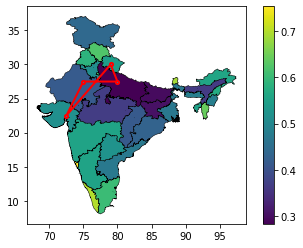

In [36]:
base = map_df.plot(column=df['DI_AM'], edgecolor='black', linewidth=0.5, legend=True)
g2=GeoSeries([p18,p7,p17,p16,p15])
g2.plot(ax=base, facecolor='none', edgecolor='red', markersize=10, linewidth=2)

In [16]:
color = []
for i in range(len(edges)):
    if i//10 <= 2:color.append([1,0,0])
    if i//10 >2 and i//10<=4: color.append([1,1,0])
    if i//10 >4 and i//10<=6: color.append([0,1,0])
    if i//10 >6 and i//10<=8: color.append([0,1,1])
    if i//10 >8 and i//10<=10:color.append([0,0,1])
    if i//10 >10:color.append([0,0,0.5])
color = np.array(color)

In [20]:
#for i in range(2,len(edges),2):
#    temp= map_df.iloc[edges[:i], :]
#    base=map_df.plot(color='white', edgecolor='black')
#    temp.plot(ax=base, color=color[:i])
#    plt.savefig('Edges_Order_of_Appearance/Edges_order_of_appearance'+str(i/2)+'.png')

In [19]:
images=[]
for i in range(1,64):
    images.append(imageio.imread('Edges_Order_of_Appearance/Edges_order_of_appearance'+str(i)+'.0.png'))
imageio.mimsave('Edges_order_of_apperance.gif', images, duration=0.8)